In [4]:
# input image
img_path = "sample_img/avatar copy.png"

### 1. Convert Image to Hexadecimal Hash Using Average Hash

In [16]:
from PIL import Image
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

# average hashing
image = Image.open(img_path)
# 1. convert image to grayscale
gray_image = image.convert("L")
# 2. resize image to 8x8
resized_gray = gray_image.resize((8,8))
# convert to pil image object to array
pixels = np.asarray(resized_gray)
# get average pixel value
avg_px = np.mean(pixels)
#  get bits: if px > avg_px = 1, else 0
bits = pixels > avg_px
# flatten bits and convert to bit string
bit_string = ''.join(str(bit) for bit in 1*bits.flatten())
# convert to hexadecimal 
hexadecimal_hash = hex(int(bit_string, 2))[2:]  # [2:] to remove the "0x" prefix


### 1.1 Visualising Original Image

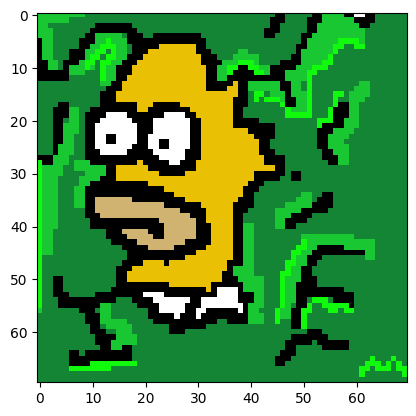

In [17]:
plt.imshow(image)

### 2. Encoded Image in Bit String

In [18]:
image_name = os.path.basename(img_path)
print(f"{image_name} in bit string: {bit_string}")

avatar copy.png in bit string: 0000001000110010011110001011100010111000001110000000100000000001


In [19]:
print(f"{image_name} in hexadecimal: {hexadecimal_hash}")

avatar copy.png in hexadecimal: 23278b8b8380801


### 3. Plotting Intemediate Images

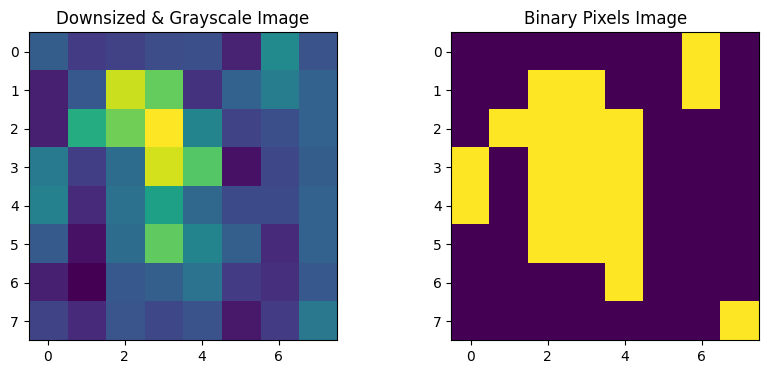

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns
axes[0].imshow(pixels)
axes[1].imshow(bits)
axes[0].title.set_text('Downsized & Grayscale Image')
axes[1].title.set_text('Binary Pixels Image')



plt.imshow(pixels)
plt.imshow(bits)


### 1. Perceptual Hashing Image 

In [21]:
from scipy.fftpack import dct, idct

def dct_2d(img):
    return dct(dct(img.T, norm='ortho').T, norm='ortho')

In [22]:
img = cv2.imread(img_path)
img = cv2.resize(img, (32,32), interpolation=cv2.INTER_AREA)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_dct = dct_2d(gray_img)
img_idct = dct(dct(img_dct.T, norm='ortho').T, norm='ortho')
avg_dct = np.mean(img_dct)
bits = np.asarray(img_dct) > avg_dct
bit_string = ''.join(str(bit) for bit in 1*bits.flatten())
hexadecimal_hash = hex(int(bit_string, 2))

In [25]:
image_name = os.path.basename(img_path)
print(f"{image_name} in bit string: {bit_string}")
print(f"{image_name} in hexadecimal: {hexadecimal_hash}")

avatar copy.png in bit string: 110011011101100011001101100100011100010010110010000110010110000000110011001001110011000100101110001111110010111100001100000111000011100110000011000100001000110001011001101110010110011011100010110110001101100001101111111000010111001111101000110111011100100000011110110011111111100100100010001111101100011101110000000111001001011100000111110000101001100111000011000000110100101111100101111000001111100001111011110000110100111000011101100100010000001101100010001001111010110000001110000110001111110001011000000110110001100000011110100110000001101010000110001000110000011001001100110010111001100110100000111100001111000111100100010100111100000111000110001100001100011100100110001111100111100011111000001111010111001001110000011011100101101011000001110011110000111111000000001110001100011100011001100110001000110000111000111001110000011011000111100110001001110010000111111000000110000000011000110100011001100111100100000100100100000100111011000001111001110000001000100111010

### 2. Visualising Image after Discrete Cosine Transform (DCT)

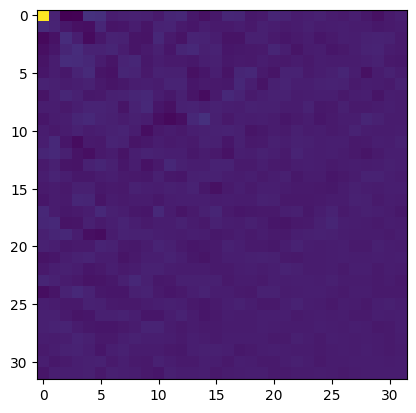

In [24]:
plt.imshow(img_dct)

### 3. Visualise Reversed DCT Image
From the reversed DCT image, we can see that most of the details as the original image

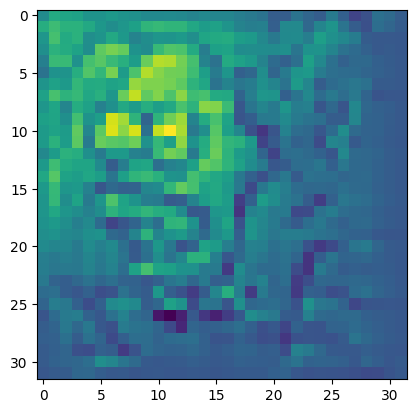

In [23]:
plt.imshow(img_idct)